In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## This week we learn about 5 important things: 
1. **What is Machine Learning**
2. **Model Training Procedure**

Gradient descent etc.

3. **Classification & Regression**

How the problem differs, the performance metric, and appropriate preprocessing

4. **Linear Model, Logistic Regression, & its Hyperparameter**

Mathematical model, regularization, and when to use which

5. **Support Vector Machine & its Hyperparameter**

Kernel, soft-margin, and its application to regression or classification

In [ ]:
pipeline

# ML Landscape

*Machine  Learning  is  the  field  of  study  that  gives computers the ability to learn without being explicitly programmed.*

— Arthur Samuel, 1959

In Data Science, we can use machine learning to construct a predictive model. Simply put, we give the model a set of input data and the model will give as an output. By machine learning, we can get our machine to automatically fit a model that give the most appropriate output by learning from set of data that we have previously give.

Imagine we have a set of house price data from 2014-05 to 2015-02 as follows

In [2]:
id_cols = ['id','date']
feature_cols = ['sqft_living','sqft_lot','sqft_above','sqft_basement'
                ,'floors','bedrooms','bathrooms','condition','grade']
target_cols = ['price']
df=pd.read_csv('data/kc_house_data.csv',usecols=id_cols+feature_cols+target_cols)
df=df[id_cols+feature_cols+target_cols]
df['date']=df['date'].astype(str).apply(lambda x:x[0:8])
df_train = df[df['date']<'201503'].sort_values(['date'])
df_train

,id,date,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bedrooms,bathrooms,condition,grade,price
8892,1245003160,20140502,2200,11250,1300,900,1.5,4,2.25,5,7,698000.0
172,1999700045,20140502,1340,7912,1340,0,1.5,3,1.50,3,7,313000.0
19830,9267200226,20140502,1770,1235,1600,170,3.0,3,2.50,3,8,436110.0
502,5467900070,20140502,1930,11947,1930,0,1.0,3,2.00,4,8,342000.0
1041,7197300105,20140502,1940,10500,1140,800,1.0,4,2.50,4,7,550000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5214,3303980680,20150228,3430,13609,3430,0,2.0,4,3.50,3,11,997000.0
21306,1862400541,20150228,1810,1585,1810,0,3.0,3,2.50,3,7,579950.0
308,7171200445,20150228,1010,5000,1010,0,1.5,2,1.00,4,6,550700.0
2750,2408600160,20150228,1252,25002,992,260,1.0,4,2.50,3,8,352000.0


Then, we are given a set of house data on 2015-03 onwards as follows, unfortunately we are unable to get the price data for these data

In [3]:
df_test = df[df['date']>='201503'].sort_values(['date'])[id_cols+feature_cols]
df_test

,id,date,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bedrooms,bathrooms,condition,grade
12313,7519001275,20150301,1510,5200,860,650,1.0,3,1.75,4,7
19176,9191201325,20150301,2040,2750,1260,780,1.5,4,1.75,4,6
9015,7518500301,20150301,1180,2250,1180,0,1.5,3,1.00,3,7
18100,9191201385,20150301,1640,3400,930,710,1.0,3,1.75,4,7
19344,2114700090,20150301,720,5040,720,0,1.0,2,0.75,3,4
...,...,...,...,...,...,...,...,...,...,...,...
20472,5057100110,20150514,3223,6371,3223,0,2.0,5,3.00,3,9
6197,9178601660,20150514,3320,5354,3320,0,2.0,5,3.00,3,9
5637,7923600250,20150515,1870,7344,1870,0,1.5,5,2.00,3,7
13053,5101400871,20150524,1390,6670,720,670,1.0,2,1.75,3,6


With the help of Machine Learning, we can build a model, program, or algorithm to estimate the right price for the new data we have.

Based on the output type, we can classify machine learning into two type, classification or regression machine. Classification means we are predicting classes and regression means we are predicting quantities. In the house price example, we need to make a regression model.

## Linear Regression Model

There are five assumptions associated with a linear regression model:

- Linear relationship: The relationship between X and the mean of Y is linear.
- Multivariate normality: For any fixed value of X, Y is normally distributed.
- No or little multicollinearity: Observations are independent of each other.
- No auto-correlation: The residuals are independent from each other.
- Homoscedasticity: The variance of residual is the same for any value of X.

If any of these assumptions is violated (i.e., if there are nonlinear relationships between dependent and independent variables or the errors exhibit correlation, heteroscedasticity, or non-normality), then the forecasts, confidence intervals, and scientific insights yielded by a regression model may be (at best) **inefficient** or (at worst) seriously **biased or misleading**

# Regression

In [4]:
df_train.describe()

,id,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bedrooms,bathrooms,condition,grade,price
count,1.686100e+04,16861.000000,1.686100e+04,16861.000000,16861.000000,16861.000000,16861.000000,16861.000000,16861.000000,16861.000000,1.686100e+04
mean,4.563955e+09,2091.076627,1.502738e+04,1797.127454,293.949173,1.498636,3.375007,2.123792,3.423285,7.669830,5.360867e+05
std,2.874015e+09,928.258847,3.899894e+04,836.358189,446.580507,0.541541,0.937673,0.773627,0.661786,1.179474,3.660370e+05
min,1.000102e+06,290.000000,5.200000e+02,290.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,7.500000e+04
25%,2.113701e+09,1430.000000,5.075000e+03,1200.000000,0.000000,1.000000,3.000000,1.750000,3.000000,7.000000,3.199900e+05
50%,3.904901e+09,1920.000000,7.650000e+03,1570.000000,0.000000,1.500000,3.000000,2.250000,3.000000,7.000000,4.490000e+05
75%,7.299601e+09,2560.000000,1.076600e+04,2230.000000,570.000000,2.000000,4.000000,2.500000,4.000000,8.000000,6.400000e+05
max,9.900000e+09,13540.000000,1.074218e+06,9410.000000,4820.000000,3.500000,33.000000,8.000000,5.000000,13.000000,7.700000e+06


In [21]:
X = df_train[feature_cols]
y = df_train['price']

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

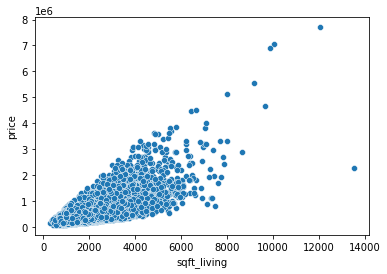

In [162]:
sns.scatterplot(data=df_train,x='sqft_living',y='price')

After we explore the data enough, we can decide which features we want to use on our model. It is also a common practice to add other features that is previously not on the dataset by manipulating one or more column values. This practice is called Feature Engineering

Handling Autocorrelated features

In [22]:
#Checking Autocorrelation
print(np.abs((X.corr())>0.7).agg('sum').sum()-len(X.columns))
df_train.corr()

8


,id,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bedrooms,bathrooms,condition,grade,price
id,1.000000,-0.015356,-0.131430,-0.013953,-0.005787,0.014866,-0.002344,0.002408,-0.023910,0.004013,-0.019328
sqft_living,-0.015356,1.000000,0.183479,0.876997,0.436148,0.352634,0.570534,0.753648,-0.059068,0.762366,0.709065
sqft_lot,-0.131430,0.183479,1.000000,0.192232,0.021366,-0.000726,0.034365,0.092202,-0.008855,0.122094,0.090345
sqft_above,-0.013953,0.876997,0.192232,1.000000,-0.049886,0.522859,0.473018,0.685740,-0.161167,0.756599,0.614526
sqft_basement,-0.005787,0.436148,0.021366,-0.049886,1.000000,-0.246230,0.300037,0.282269,0.179055,0.167685,0.322969
floors,0.014866,0.352634,-0.000726,0.522859,-0.246230,1.000000,0.173411,0.500509,-0.266993,0.459271,0.262166
bedrooms,-0.002344,0.570534,0.034365,0.473018,0.300037,0.173411,1.000000,0.513108,0.029398,0.353400,0.305040
bathrooms,0.002408,0.753648,0.092202,0.685740,0.282269,0.500509,0.513108,1.000000,-0.124654,0.663398,0.529698
condition,-0.023910,-0.059068,-0.008855,-0.161167,0.179055,-0.266993,0.029398,-0.124654,1.000000,-0.147609,0.037563
grade,0.004013,0.762366,0.122094,0.756599,0.167685,0.459271,0.353400,0.663398,-0.147609,1.000000,0.671793


In [23]:
X['sqft_living_per_lot'] = X['sqft_living']/X['sqft_lot']
X['sqft_above_per_floors'] = X['sqft_above']/X['floors']

<ipython-input-23-6ab4279a1f68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sqft_living_per_lot'] = X['sqft_living']/X['sqft_lot']
<ipython-input-23-6ab4279a1f68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sqft_above_per_floors'] = X['sqft_above']/X['floors']


In [24]:
final_feature_cols = ['sqft_living','sqft_living_per_lot','sqft_above_per_floors','sqft_basement'
                ,'floors','bedrooms','condition']
X = X[final_feature_cols]
#Checking Multicorrelation
print((np.abs(X.corr())>0.7).agg('sum').sum()-len(X.columns))
X.corr()

0


,sqft_living,sqft_living_per_lot,sqft_above_per_floors,sqft_basement,floors,bedrooms,condition
sqft_living,1.000000,0.074869,0.661617,0.436148,0.352634,0.570534,-0.059068
sqft_living_per_lot,0.074869,1.000000,-0.323535,0.064562,0.552523,0.027531,-0.156499
sqft_above_per_floors,0.661617,-0.323535,1.000000,0.180110,-0.246448,0.381658,0.049490
sqft_basement,0.436148,0.064562,0.180110,1.000000,-0.246230,0.300037,0.179055
floors,0.352634,0.552523,-0.246448,-0.246230,1.000000,0.173411,-0.266993
bedrooms,0.570534,0.027531,0.381658,0.300037,0.173411,1.000000,0.029398
condition,-0.059068,-0.156499,0.049490,0.179055,-0.266993,0.029398,1.000000


In [36]:
from sklearn.model_selection import train_test_split
X_train = X[:int(len(df_train)*0.8)]
X_val = X[int(len(df_train)*0.8):]
y_train = y[:int(len(df_train)*0.8)]
y_val = y[int(len(df_train)*0.8):]
print(X_train.shape)
print(X_val.shape)

(13488, 7)
(3373, 7)


Standardization

In [37]:
from sklearn.preprocessing import StandardScaler,normalize
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [39]:
def z_scoring(arrays):
    arr_mean = arrays.mean()
    arr_std = arrays.std()
    arr_rst = (arrays-arr_mean)/arr_std
    return arr_rst,arr_mean,arr_std

def restore_z_score(arrays,arr_mean,arr_std):
    return arrays*arr_std+arr_mean

In [40]:
X_train_trf = scaler.transform(X_train) 
y_train_trf,y_mean,y_std = z_scoring(y_train)

Model Zoo

In machine learning we have many options of models to choose from. So far, we have learn two possible model for regression; Linear regression and SVM. Both of the models may be extended, e.g. adding polynomial feature to linear regression or embedding kernel to SVM.

In [41]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor
from sklearn.svm import SVR

models_dict={}

# Vanilla Linear Regression
models_dict["LinReg"]= LinearRegression()
# Ridge Regression
models_dict["Ridge"] = Ridge()
# Lasso Regression
models_dict["Lasso"] = Lasso()
# ElasticNet Regression (Combination of L1 and L2)
models_dict["ElasticNet"] = ElasticNet()
# SGD regressor
models_dict["SGD_LinReg"] = SGDRegressor()
# Linear SVR
models_dict["SVR"] = SVR(kernel='linear',C=1)
# RBF SVR
models_dict["SVR_rbf"] = SVR(kernel='rbf',C=1)
# Poly SVR
models_dict["SVR_poly"] = SVR(kernel='poly',C=1)
# RBF SVR with less regularization
models_dict["SVR_rbf_lessreg"]= SVR(kernel='rbf',C=10)
# RBF SVR with high regularization
models_dict["SVR_rbf_highreg"]= SVR(kernel='rbf',C=0.1)

In [42]:
for model_name, model in models_dict.items():
    print("Training model {0}".format(model_name))
    %time model.fit(X_train_trf, y_train_trf)

Training model LinReg
Wall time: 3.99 ms
Training model Ridge
Wall time: 2 ms
Training model Lasso
Wall time: 999 µs
Training model ElasticNet
Wall time: 994 µs
Training model SGD_LinReg
Wall time: 12 ms
Training model SVR
Wall time: 8.52 s
Training model SVR_rbf
Wall time: 4.9 s
Training model SVR_poly
Wall time: 17.9 s
Training model SVR_rbf_lessreg
Wall time: 7.89 s
Training model SVR_rbf_highreg
Wall time: 4.24 s


Model Inference

In [43]:
X_val_trf = scaler.transform(X_val) 

In [90]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import time
prediction_results_train=[]
prediction_results_val=[]


for model_name, model in models_dict.items():
    
    t = time.time()
    print("Inferencing model {0}".format(model_name))
    model_pred = model.predict(X_val_trf)
    
    prediction = restore_z_score(model_pred,y_mean,y_std)
    
    prediction_results_val.append(prediction)
    
    
    
    model_pred = model.predict(X_train_trf)
    prediction = restore_z_score(model_pred,y_mean,y_std)
    prediction_results_train.append(prediction)
    
    print("elapsed time: {0:.2f}".format(time.time() - t))

Inferencing model LinReg
elapsed time: 0.00
Inferencing model Ridge
elapsed time: 0.00
Inferencing model Lasso
elapsed time: 0.00
Inferencing model ElasticNet
elapsed time: 0.00
Inferencing model SGD_LinReg
elapsed time: 0.00
Inferencing model SVR
elapsed time: 1.10
Inferencing model SVR_rbf
elapsed time: 2.68
Inferencing model SVR_poly
elapsed time: 1.49
Inferencing model SVR_rbf_lessreg
elapsed time: 2.82
Inferencing model SVR_rbf_highreg
elapsed time: 2.74


Error Evaluation

In [192]:
len(y_pred)

13488

In [193]:
mae_errors_val = []
rmses_val = []
for y_pred in prediction_results_val:
    mae_errors_val.append(mean_absolute_error(y_val, y_pred))
    rmses_val.append(np.sqrt(mean_squared_error(y_val,y_pred)))

mae_errors_train = []
rmses_train = []
for y_pred in prediction_results_train:
    mae_errors_train.append(mean_absolute_error(y_train, y_pred))
    rmses_train.append(np.sqrt(mean_squared_error(y_train,y_pred)))

In [194]:
print(np.argmin(mae_errors))
d = {'model':models_dict.keys(),'MAE_train': mae_errors_train, 'RMSE_train': rmses_train,
     'MAE_val': mae_errors_val, 'RMSE_val': rmses_val}
df_results = pd.DataFrame(data=d)
df_results['MAE_diff']=df_results['MAE_train']-df_results['MAE_val']
df_results['RMSE_diff']=df_results['RMSE_train']-df_results['RMSE_val']

6


In [195]:
df_results.sort_values('MAE_val')

,model,MAE_train,RMSE_train,MAE_val,RMSE_val,MAE_diff,RMSE_diff
6,SVR_rbf,290848.256246,447190.690255,146794.933868,232505.437113,144053.322377,214685.253141
8,SVR_rbf_lessreg,132188.094994,212187.280885,147361.015445,234503.632801,-15172.920450,-22316.351916
9,SVR_rbf_highreg,146987.622385,266480.350808,150521.120776,242873.573688,-3533.498391,23606.777120
5,SVR,155863.044249,260034.861647,158624.631311,248332.255257,-2761.587062,11702.606389
7,SVR_poly,155224.679180,254265.879835,162918.877537,271312.321630,-7694.198357,-17046.441795
1,Ridge,162540.028892,251182.066359,167145.520905,245088.083552,-4605.492013,6093.982807
0,LinReg,162546.261997,251182.036772,167152.700673,245095.380934,-4606.438676,6086.655838
4,SGD_LinReg,176252.299907,257570.145373,181795.734906,254712.302302,-5543.434998,2857.843071
3,ElasticNet,207321.481190,334599.110954,209389.467722,316742.705564,-2067.986533,17856.405390
2,Lasso,233437.214309,369829.432740,234712.381517,350521.335145,-1275.167208,19308.097594


In [153]:
id_train = df_train[:int(len(df_train)*0.8)][id_cols]
id_val = df_train[int(len(df_train)*0.8):][id_cols]

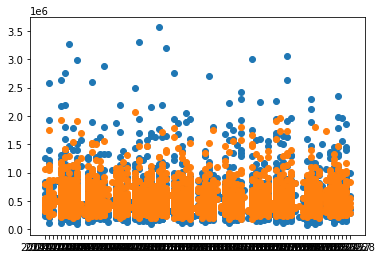

In [154]:
plt.scatter(id_val['date'],y_val)
plt.scatter(id_val['date'],prediction_results_val[6])

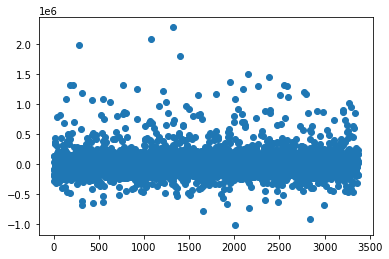

In [155]:
plt.scatter(list(range(len(y_val))),y_val-prediction_results_val[6])

Deeper Analysis

In [183]:
final_feature_cols

['sqft_living',
 'sqft_living_per_lot',
 'sqft_above_per_floors',
 'sqft_basement',
 'floors',
 'bedrooms',
 'condition']

In [184]:
models_dict['SVR'].coef_

array([[ 0.74169804,  0.10785361, -0.08595948, -0.06229138, -0.08406345,
        -0.12682245,  0.08740899]])

In [158]:
mae_datas = np.abs(y_train-prediction_results_train[5])
mae_datas

8892     139574.439934
172       14906.430020
19830    107755.147422
502      132721.008625
1041     103772.934114
             ...      
2587      20585.392110
1426      32113.250673
9699      10653.066782
18007     56824.977200
20943    171994.576718
Name: price, Length: 13488, dtype: float64

In [159]:
mae_datas.mean()

155863.0442489597

In [180]:
np.sort(mae_datas)[::-1][:5]

array([4721486.81292797, 4643104.67211273, 4526078.13381039,
       3379697.35682038, 3226373.32514365])

In [172]:
df_sample = df_train.iloc[mae_datas.argsort()[-5:][::-1].tolist()]
df_sample['predicted'] =prediction_results_train[5][mae_datas.argsort()[-5:][::-1].tolist()].astype(int)

<ipython-input-172-dbde650f28fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['predicted'] =prediction_results_train[5][mae_datas.argsort()[-5:][::-1].tolist()].astype(int)


In [173]:
df_sample

,id,date,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bedrooms,bathrooms,condition,grade,price,predicted
7252,6762700020,20141013,12050,27600,8570,3480,2.5,6,8.00,4,13,7700000.0,2978513
3914,9808700762,20140611,10040,37325,7680,2360,2.0,5,4.50,3,11,7062500.0,2419395
9254,9208900037,20140919,9890,31374,8860,1030,2.0,6,7.75,3,13,6885000.0,2358921
4411,2470100110,20140804,9200,35069,6200,3000,2.0,5,5.75,3,13,5570000.0,2190302
1164,1247600105,20141020,8010,45517,5990,2020,2.0,5,5.25,3,12,5110800.0,1884426


In [166]:
y_train

8892     698000.0
172      313000.0
19830    436110.0
502      342000.0
1041     550000.0
           ...   
2587     265000.0
1426     350000.0
9699     390000.0
18007    458000.0
20943    294500.0
Name: price, Length: 13488, dtype: float64

In [161]:
df_train[(df_train['sqft_living']<= 12000) &(df_train['sqft_living']>= 8000)]

,id,date,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bedrooms,bathrooms,condition,grade,price
3914,9808700762,20140611,10040,37325,7680,2360,2.0,5,4.50,3,11,7062500.0
14556,2303900035,20140611,8670,64033,6120,2550,2.0,5,6.25,3,13,2888000.0
8092,1924059029,20140617,9640,13068,4820,4820,1.0,5,6.75,3,12,4668000.0
18302,6072800246,20140702,8020,21738,8020,0,2.0,5,6.25,3,11,3300000.0
4411,2470100110,20140804,9200,35069,6200,3000,2.0,5,5.75,3,13,5570000.0
9254,9208900037,20140919,9890,31374,8860,1030,2.0,6,7.75,3,13,6885000.0
1164,1247600105,20141020,8010,45517,5990,2020,2.0,5,5.25,3,12,5110800.0


Sign of different fit between square foot living and price.

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

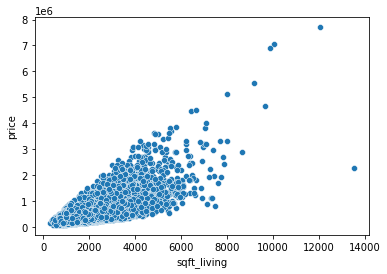

In [187]:
sns.scatterplot(data=df_train,x='sqft_living',y='price')

In [191]:
df_results[df_results['model'].isin(['SVR','SVR_poly'])]

,model,MAE_train,RMSE_train,MAE_val,RMSE_val,MAE_diff,RMSE_diff
5,SVR,155863.044249,260034.861647,158624.631311,248332.255257,-2761.587062,11702.606389
7,SVR_poly,155224.679180,254265.879835,162918.877537,271312.321630,-7694.198357,-17046.441795


Eventhough the SVR Poly captured the outlier data, we need to be cautious due to it shows sign of overfitting based on its MAE.

Secondly, we also see how MAE and RMSE may show different behaviour due to RMSE attractivity to outliers.

In machine learning we have many options of models to choose from. So far, we have learn two possible model for regression; Linear regression and SVM. Both of the models may be extended, e.g. adding polynomial feature to linear regression or embedding kernel to SVM.

# Classification

## Data Preparation

In [327]:
df=pd.read_csv('data/aug_train.csv')

In [326]:
df.head(5)

,id,sqft_living,floors,price
0,7129300520,1180,1.0,221900.0
1,6414100192,2570,2.0,538000.0
2,5631500400,770,1.0,180000.0
3,2487200875,1960,1.0,604000.0
4,1954400510,1680,1.0,510000.0


In [320]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [299]:
print(df.shape)

(19158, 14)


### Data Transformation

Transform relevant experience

In [300]:
df['num_rel_exp']=df['relevent_experience']=='Has relevent experience'

In [301]:
df_new = df
#feature_cols = ['city_development_index','num_rel_exp','training_hours']+list(new_job_dmy.columns.values)
feature_cols = ['city_development_index','num_rel_exp','training_hours']
#df_train = df_new[['city_development_index','num_rel_exp','training_hours','target']+list(new_job_dmy.columns.values)]
df_train = df_new
X = df_train[feature_cols]
y = df_train['target']

### Split data

In [308]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=69, stratify=y)

In [309]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/9, random_state=69, stratify=y_train)

In [310]:
X_train.shape

(13410, 3)

In [311]:
X_val.shape

(3832, 3)

In [312]:
X_test.shape

(1916, 3)

In [314]:
3832/len(X)

0.2000208790061593

In [315]:
13410/len(X)

0.6999686814907611

## Modelling

### Scale your data

In [233]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trf = scaler.transform(X_train) 

In [237]:
X_train

,city_development_index,num_rel_exp,training_hours
2923,0.920,False,103
12489,0.926,True,84
4275,0.920,False,52
18788,0.920,True,142
3026,0.884,False,18
...,...,...,...
429,0.624,False,72
18649,0.555,True,2
2743,0.804,False,54
18804,0.925,True,73


In [234]:
X_train_trf

array([[ 0.73536231, -1.59255304,  0.62133613],
       [ 0.78417509,  0.62792257,  0.30625994],
       [ 0.73536231, -1.59255304, -0.2243947 ],
       ...,
       [-0.20835141, -1.59255304, -0.19122879],
       [ 0.77603962,  0.62792257,  0.1238474 ],
       [-1.07071049,  0.62792257, -0.37364132]])

### Create model and train

In [241]:
model_lr = LogisticRegression(solver="lbfgs", random_state=69)
%time model_lr.fit(X_train_trf, y_train)

Wall time: 10.5 ms


LogisticRegression(random_state=69)

In [239]:
from sklearn.svm import SVC
model_svc_linear = SVC(kernel='linear', random_state=69,C=1)
%time model_svc_linear.fit(X_train_trf, y_train)

Wall time: 1.73 s


SVC(C=1, kernel='linear', random_state=69)

Model berikutnya menggunakan kernel RBF, untuk melihat pengaruh kernel tersebut pada akurasi dibanding tanpa kernel (linear)

In [123]:
from sklearn.svm import SVC
model_svc = SVC(kernel='rbf', random_state=69,C=1)
%time model_svc.fit(X_train_trf, y_train)

Wall time: 4.71 s


SVC(C=1, random_state=69)

In [116]:
from sklearn.svm import SVC
model_svc_2 = SVC(kernel='rbf', random_state=69,C=0.1)
%time model_svc_2.fit(X_train_trf, y_train)

Wall time: 3.39 s


SVC(C=0.1, random_state=69)

In [103]:
from sklearn.svm import SVC
model_svc_3 = SVC(kernel='rbf', random_state=69,C=20)
%time model_svc_3.fit(X_train_trf, y_train)

Wall time: 18.8 s


SVC(C=20, random_state=69)

In [242]:
from sklearn.svm import SVC
model_svc_poly = SVC(kernel='poly',degree=4, random_state=69,C=1)
%time model_svc_poly.fit(X_train_trf, y_train)

Wall time: 15.2 s


SVC(C=1, degree=4, kernel='poly', random_state=69)

## Model Analysis

### Performance Evaluation

In [110]:
X_val_trf = scaler.transform(X_val) 

In [124]:
%time y_val_predict = model_svc.predict(X_val_trf)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_predict))

Wall time: 362 ms
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87      2877
         1.0       0.61      0.45      0.52       955

    accuracy                           0.79      3832
   macro avg       0.72      0.68      0.69      3832
weighted avg       0.78      0.79      0.78      3832



In [244]:
%time y_val_predict = model_svc_linear.predict(X_val_trf)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_predict))

Wall time: 157 ms
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      2877
         1.0       0.00      0.00      0.00       955

    accuracy                           0.75      3832
   macro avg       0.38      0.50      0.43      3832
weighted avg       0.56      0.75      0.64      3832



C:\Users\madin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [243]:
%time y_val_predict = model_lr.predict(X_val_trf)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_predict))

Wall time: 997 µs
              precision    recall  f1-score   support

         0.0       0.78      0.95      0.86      2877
         1.0       0.58      0.22      0.32       955

    accuracy                           0.77      3832
   macro avg       0.68      0.58      0.59      3832
weighted avg       0.73      0.77      0.72      3832



In [117]:
%time y_val_predict = model_svc_2.predict(X_val_trf)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_predict))

Wall time: 373 ms
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.87      2877
         1.0       0.61      0.41      0.49       955

    accuracy                           0.79      3832
   macro avg       0.72      0.66      0.68      3832
weighted avg       0.77      0.79      0.77      3832



In [114]:
%time y_val_predict = model_svc_3.predict(X_val_trf)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_predict))

Wall time: 358 ms
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      2877
         1.0       0.60      0.45      0.51       955

    accuracy                           0.79      3832
   macro avg       0.72      0.68      0.69      3832
weighted avg       0.77      0.79      0.78      3832



In [115]:
%time y_val_predict = model_svc_poly.predict(X_val_trf)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_predict))

Wall time: 200 ms
              precision    recall  f1-score   support

         0.0       0.77      0.98      0.86      2877
         1.0       0.61      0.10      0.17       955

    accuracy                           0.76      3832
   macro avg       0.69      0.54      0.52      3832
weighted avg       0.73      0.76      0.69      3832



ROC Curve

In [125]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

In [130]:
from sklearn.model_selection import cross_val_predict

In [138]:
from sklearn.metrics import roc_curve,auc

array([-0.76070663, -1.07449444, -1.00030628, ..., -1.06423916,
       -0.2445434 , -1.02545245])

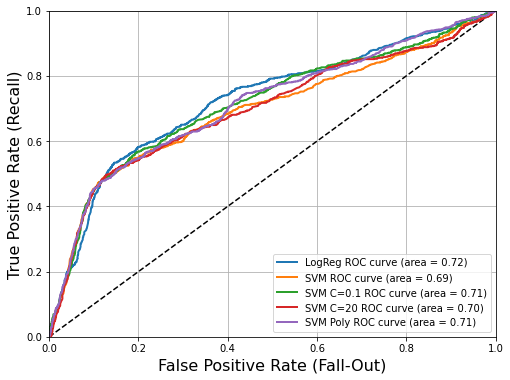

In [147]:
plt.figure(figsize=(8, 6))                                    # Not shown
plt.axis([0, 1, 0, 1])                                    # Not shown in the book
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
plt.grid(True)                                            # Not shown
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
labels=['LogReg','SVM','SVM C=0.1', 'SVM C=20','SVM Poly']
for idx,model in enumerate([model_lr,model_svc,model_svc_2,model_svc_3,model_svc_poly]):
    y_scores = model.decision_function(X_val_trf)
    fpr, tpr, thresholds = roc_curve(y_val, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")

In [248]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
y_val_pred = model_svc.predict(X_val_trf)
cm = confusion_matrix(y_val, y_val_pred)
print(cm)
print(precision_score(y_val, y_val_pred))
print(recall_score(y_val, y_val_pred))

[[2595  282]
 [ 523  432]]
0.6050420168067226
0.4523560209424084


In [249]:
from sklearn.metrics import confusion_matrix
y_val_pred = model_lr.predict(X_val_trf)
cm = confusion_matrix(y_val, y_val_pred)
print(cm)
print(precision_score(y_val, y_val_pred))
print(recall_score(y_val, y_val_pred))

[[2727  150]
 [ 748  207]]
0.5798319327731093
0.21675392670157068


### Parameter Analysis

In [250]:
len(model_svc.support_vectors_)

7442

In [251]:
model_svc.support_vectors_

array([[ 0.44248564, -1.59255304, -0.78821526],
       [ 0.46689203,  0.62792257,  0.40575768],
       [-2.27475902, -1.59255304, -0.37364132],
       ...,
       [-0.74529197,  0.62792257,  0.42234064],
       [-1.67273476, -1.59255304,  0.10726445],
       [-1.07071049,  0.62792257, -0.37364132]])